Tugas: Implementasi Operasi Morfologi Citra

* 5025221058 - Muhammad Abdurrahman Faiz
* 5025231248 - Mufrih Fakhir
* 5025221044 - Wildan Fauzy Maulana Hasyim

## Bagian 1: Konsep Dasar

### 1.1 Konsep Dasar (Teori)

* **Himpunan Spasial:** Dalam citra biner, objek (foreground) direpresentasikan sebagai himpunan piksel bernilai 1 (atau 255), dan latar belakang (background) sebagai himpunan piksel bernilai 0.
* **Konektivitas:** Menentukan piksel mana yang dianggap "bertetangga".
    * **4-konektivitas:** Hanya tetangga horizontal dan vertikal.
    * **8-konektivitas:** Termasuk tetangga diagonal.
* **Structuring Element (SE):** Ini adalah *kernel* atau *mask* biner kecil yang digunakan untuk "menyentuh" citra. Titik pusat SE (disebut *origin*) digeser ke setiap piksel pada citra. Bentuk dan ukuran SE sangat menentukan hasil operasi.

## Bagian 2: Operasi Morfologi Dasar

### 2.1 Dilasi (Dilation)

**Teori:** Dilasi "menebalkan" atau "memperluas" area objek (foreground).  Operasi ini mengambil nilai piksel **maksimum** dari area yang ditutupi oleh SE. Pada citra biner, ini berarti jika *setidaknya satu* piksel di bawah SE adalah 1, maka piksel output di titik *origin* SE menjadi 1.

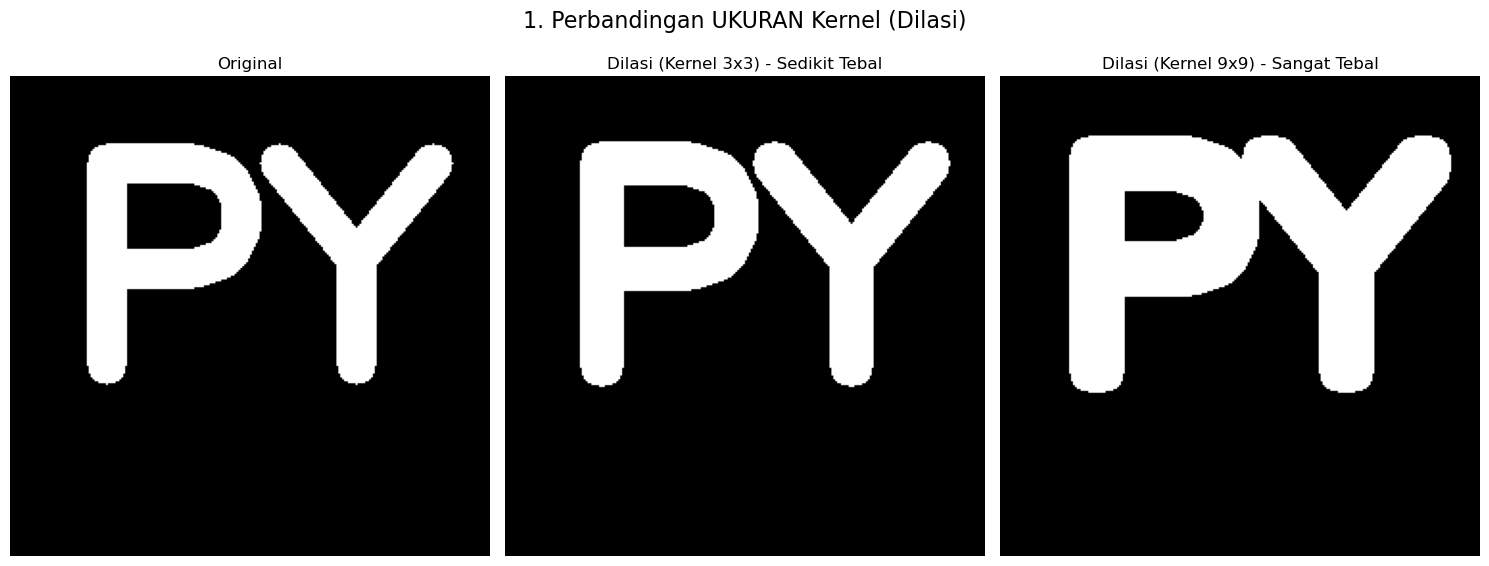

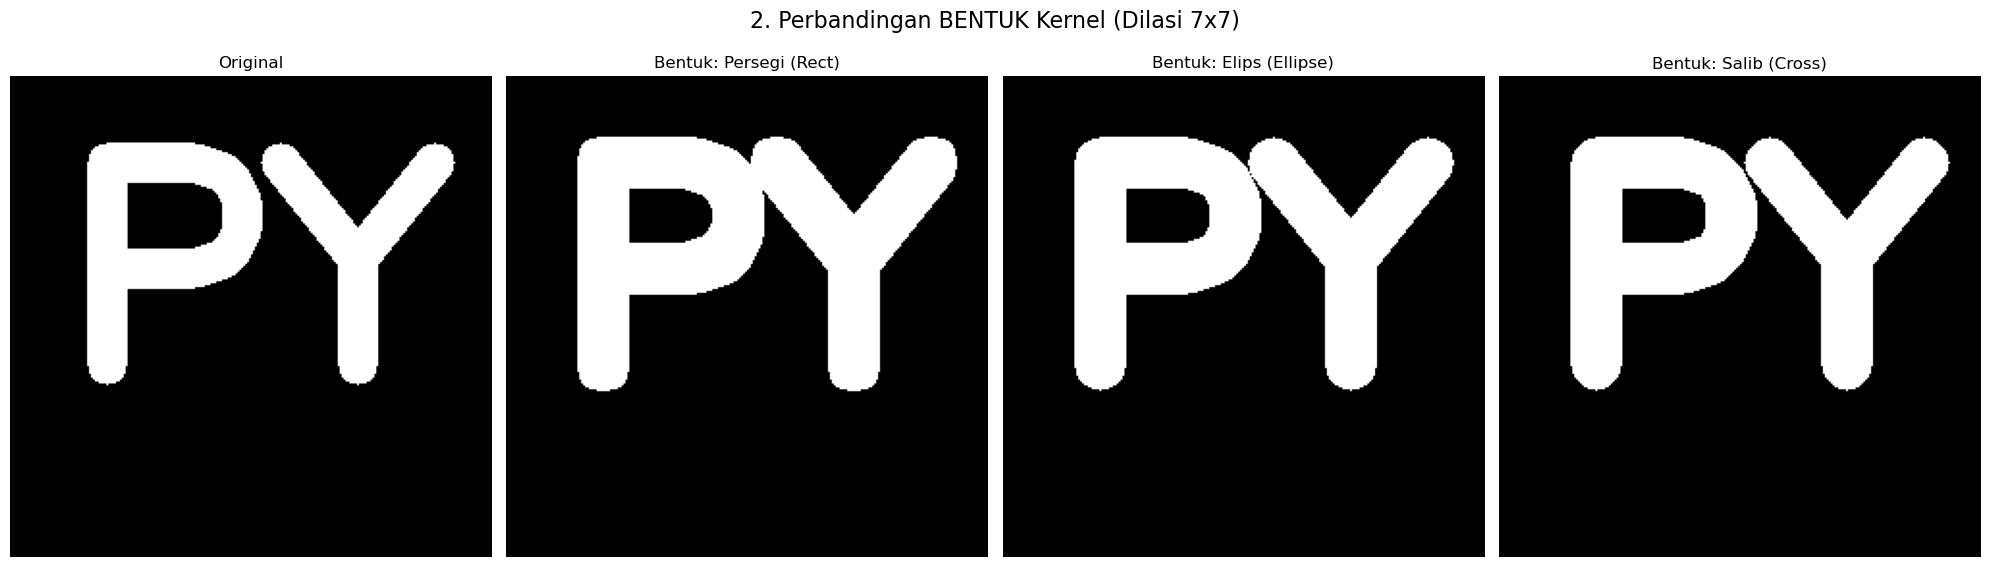

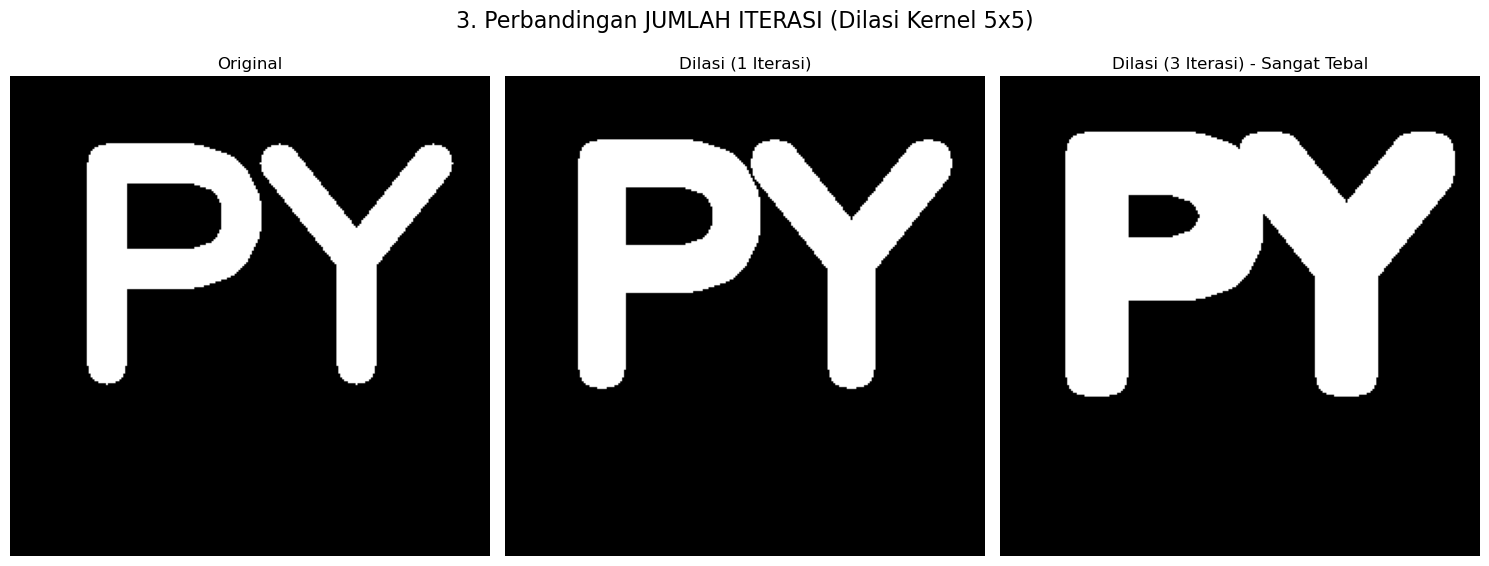

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((250, 250), dtype=np.uint8)

cv2.putText(img, "PY", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 5, (255), 20)
kernel_small = np.ones((3, 3), np.uint8)
dilation_small = cv2.dilate(img, kernel_small, iterations=1)

kernel_large = np.ones((9, 9), np.uint8)
dilation_large = cv2.dilate(img, kernel_large, iterations=1)

plt.figure(figsize=(15, 6))
plt.suptitle("1. Perbandingan UKURAN Kernel (Dilasi)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Dilasi (Kernel 3x3) - Sedikit Tebal")
plt.imshow(dilation_small, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Dilasi (Kernel 9x9) - Sangat Tebal")
plt.imshow(dilation_large, cmap='gray')
plt.axis('off')

plt.tight_layout()

kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
dilation_rect = cv2.dilate(img, kernel_rect, iterations=1)

kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
dilation_ellipse = cv2.dilate(img, kernel_ellipse, iterations=1)

kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))
dilation_cross = cv2.dilate(img, kernel_cross, iterations=1)

plt.figure(figsize=(20, 6))
plt.suptitle("2. Perbandingan BENTUK Kernel (Dilasi 7x7)", fontsize=16)

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Bentuk: Persegi (Rect)")
plt.imshow(dilation_rect, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Bentuk: Elips (Ellipse)")
plt.imshow(dilation_ellipse, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Bentuk: Salib (Cross)")
plt.imshow(dilation_cross, cmap='gray')
plt.axis('off')

plt.tight_layout()

kernel_5x5 = np.ones((5, 5), np.uint8)

dilation_1_iter = cv2.dilate(img, kernel_5x5, iterations=1)

dilation_3_iter = cv2.dilate(img, kernel_5x5, iterations=3)

plt.figure(figsize=(15, 6))
plt.suptitle("3. Perbandingan JUMLAH ITERASI (Dilasi Kernel 5x5)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Dilasi (1 Iterasi)")
plt.imshow(dilation_1_iter, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Dilasi (3 Iterasi) - Sangat Tebal")
plt.imshow(dilation_3_iter, cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.show()

### 2.2 Erosi (Erosion)

**Teori:** Erosi "mengikis" atau "menyusutkan" area objek.  Operasi ini mengambil nilai piksel **minimum** dari area yang ditutupi oleh SE. Pada citra biner, ini berarti *semua* piksel di bawah SE harus 1 agar piksel output di titik *origin* SE menjadi 1.

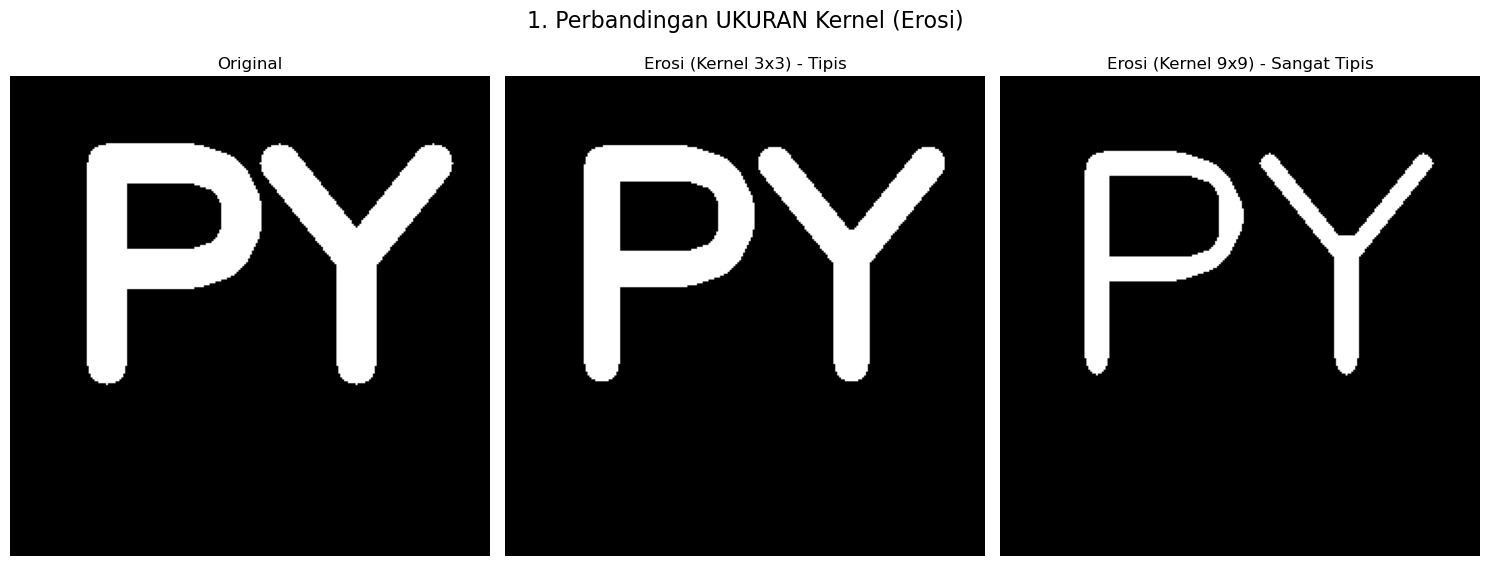

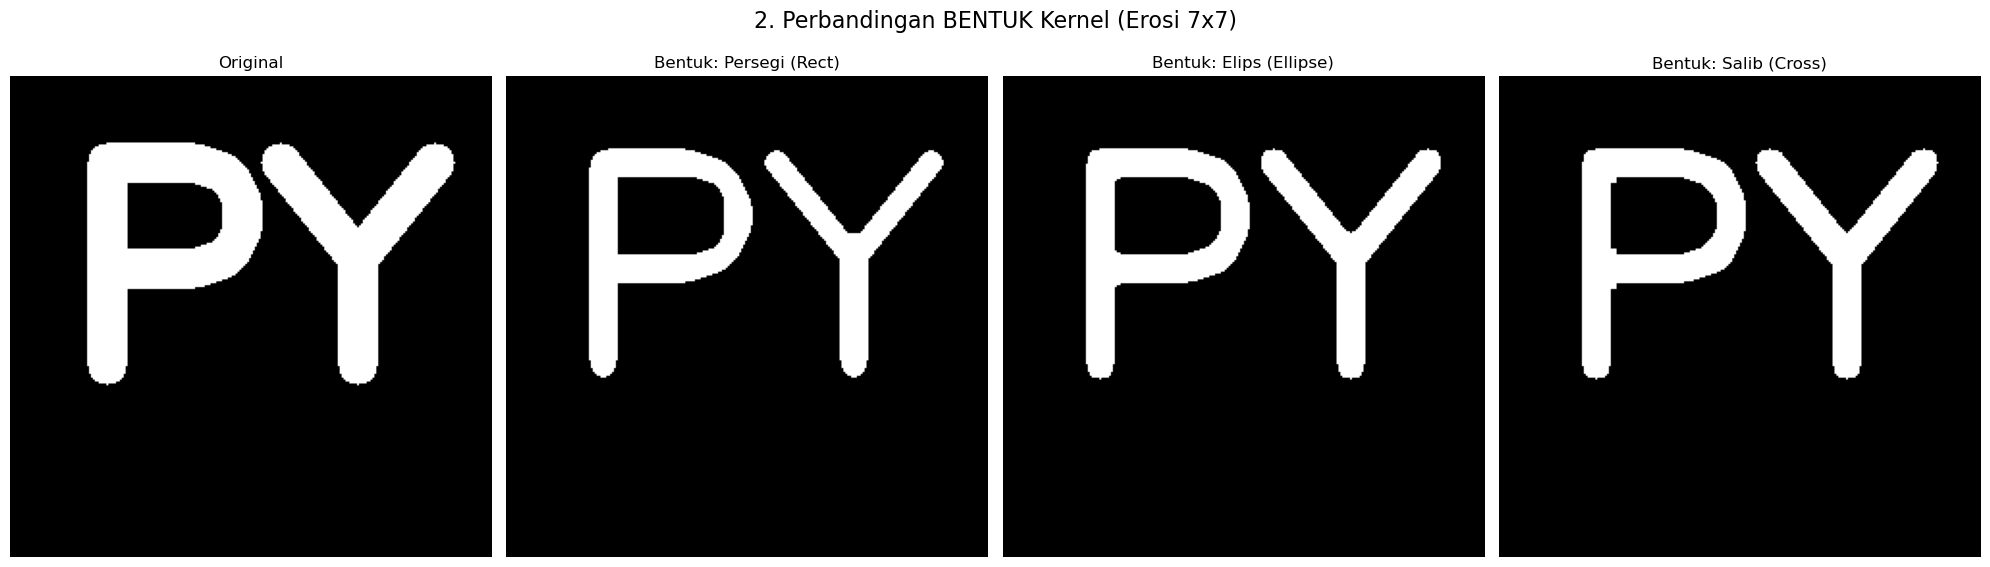

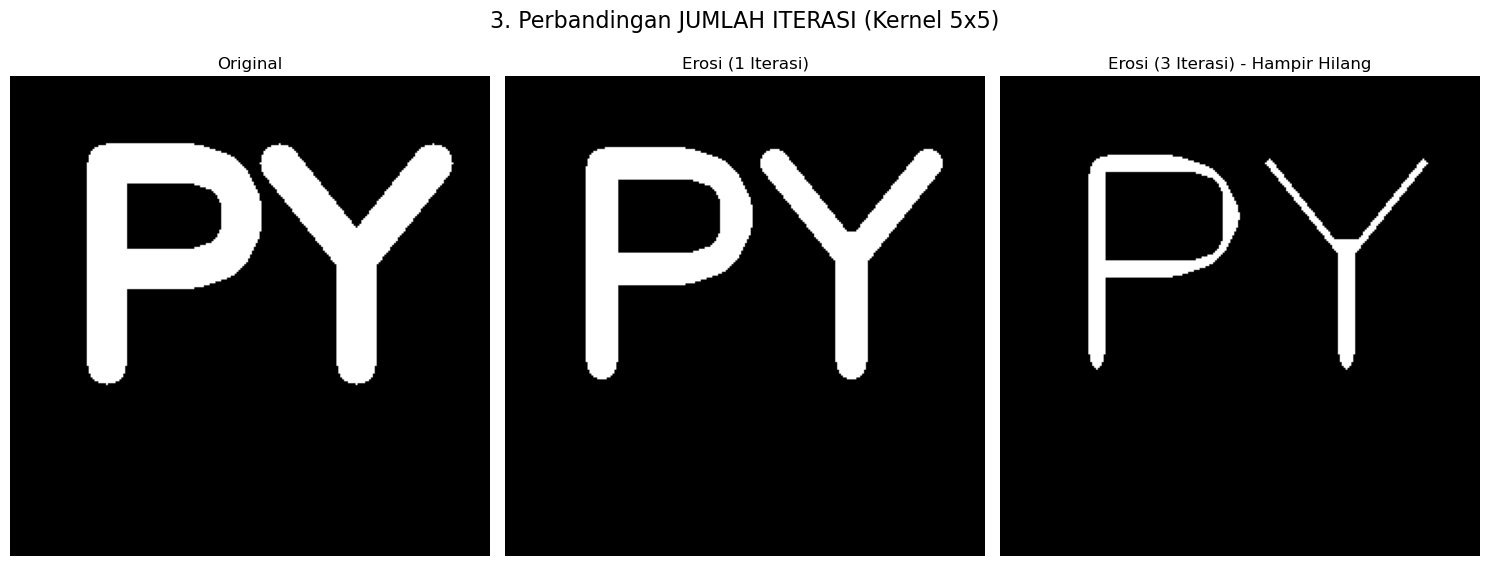

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((250, 250), dtype=np.uint8)

cv2.putText(img, "PY", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 5, (255), 20)

kernel_small = np.ones((3, 3), np.uint8)
erosion_small = cv2.erode(img, kernel_small, iterations=1)

kernel_large = np.ones((9, 9), np.uint8)
erosion_large = cv2.erode(img, kernel_large, iterations=1)

plt.figure(figsize=(15, 6))
plt.suptitle("1. Perbandingan UKURAN Kernel (Erosi)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Erosi (Kernel 3x3) - Tipis")
plt.imshow(erosion_small, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Erosi (Kernel 9x9) - Sangat Tipis")
plt.imshow(erosion_large, cmap='gray')
plt.axis('off')

plt.tight_layout()

kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
erosion_rect = cv2.erode(img, kernel_rect, iterations=1)

kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
erosion_ellipse = cv2.erode(img, kernel_ellipse, iterations=1)

kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))
erosion_cross = cv2.erode(img, kernel_cross, iterations=1)

plt.figure(figsize=(20, 6))
plt.suptitle("2. Perbandingan BENTUK Kernel (Erosi 7x7)", fontsize=16)

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Bentuk: Persegi (Rect)")
plt.imshow(erosion_rect, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Bentuk: Elips (Ellipse)")
plt.imshow(erosion_ellipse, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Bentuk: Salib (Cross)")
plt.imshow(erosion_cross, cmap='gray')
plt.axis('off')

plt.tight_layout()


kernel_5x5 = np.ones((5, 5), np.uint8)

erosion_1_iter = cv2.erode(img, kernel_5x5, iterations=1)

erosion_3_iter = cv2.erode(img, kernel_5x5, iterations=3)

plt.figure(figsize=(15, 6))
plt.suptitle("3. Perbandingan JUMLAH ITERASI (Kernel 5x5)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Erosi (1 Iterasi)")
plt.imshow(erosion_1_iter, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Erosi (3 Iterasi) - Hampir Hilang")
plt.imshow(erosion_3_iter, cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.show()

## Bagian 3: Operasi Morfologi Gabungan

### 3.1 Opening

**Teori:** Opening adalah **Erosi** diikuti oleh **Dilasi** (menggunakan SE yang sama).
* Rumus: $A \circ B = (A \ominus B) \oplus B$
* Kegunaan: Menghilangkan noise "salt" (titik putih kecil), memutus jembatan tipis (*isthmus*), dan menghaluskan kontur objek dari luar tanpa mengubah ukuran objek secara signifikan.

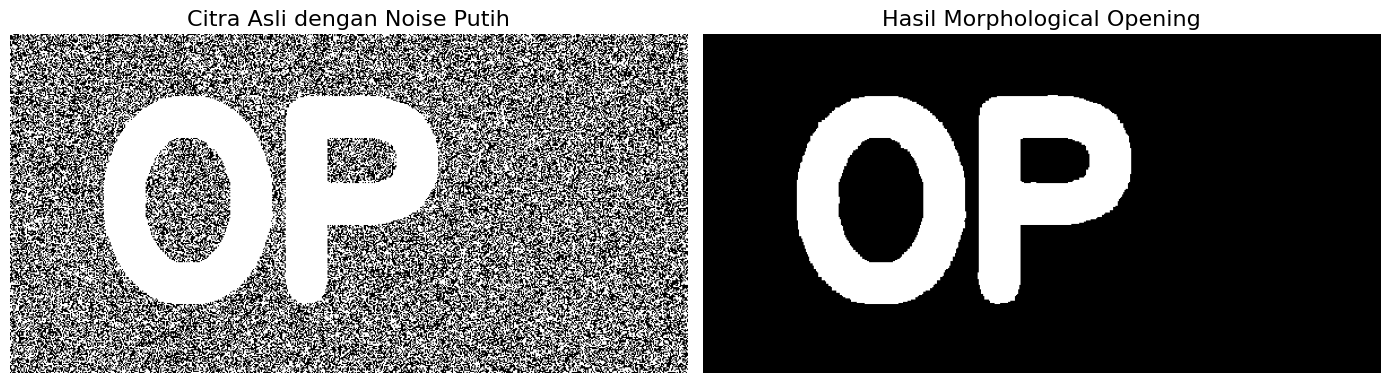

In [21]:
img_open = np.zeros((300, 600), dtype=np.uint8)
cv2.putText(img_open, "OP", (80, 220), cv2.FONT_HERSHEY_SIMPLEX, 7, 255, 35)

noise = np.random.randint(0, 2, img_open.shape, dtype=np.uint8) * 255
noisy_open = cv2.bitwise_or(img_open, noise)

# Opening
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(noisy_open, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1); plt.imshow(noisy_open, cmap='gray')
plt.title("Citra Asli dengan Noise Putih", fontsize=16)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(opening, cmap='gray')
plt.title("Hasil Morphological Opening", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


### 3.2 Closing

**Teori:** Closing adalah **Dilasi** diikuti oleh **Erosi** (menggunakan SE yang sama).
* Rumus: $A \bullet B = (A \oplus B) \ominus B$
* Kegunaan: Mengisi lubang-lubang kecil (*holes*) di dalam objek, menggabungkan celah sempit, dan menghaluskan kontur objek dari dalam.

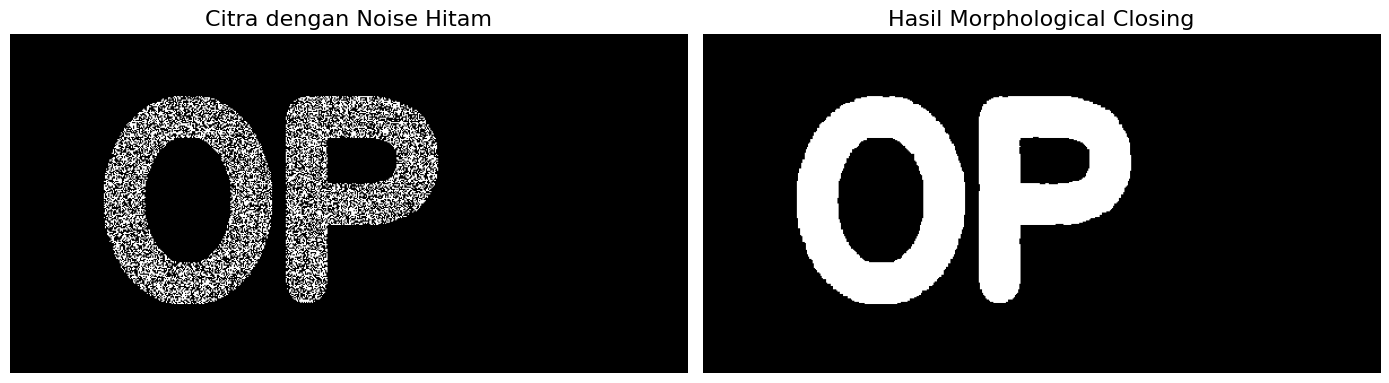

In [22]:
img_close = np.zeros((300, 600), dtype=np.uint8)
cv2.putText(img_close, "OP", (80, 220), cv2.FONT_HERSHEY_SIMPLEX, 7, 255, 35)

noise = np.random.randint(0, 2, img_close.shape, dtype=np.uint8) * 255
inverted_noise = cv2.bitwise_not(noise)
noisy_close = cv2.bitwise_and(img_close, inverted_noise)

# Closing
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(noisy_close, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1); plt.imshow(noisy_close, cmap='gray')
plt.title("Citra dengan Noise Hitam", fontsize=16)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(closing, cmap='gray')
plt.title("Hasil Morphological Closing", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

## Bagian 4: Operasi Morfologi Lanjutan

### 4.1 Gradien Morfologi (Morphological Gradient)

**Teori:** Gradien adalah perbedaan antara **Dilasi** dan **Erosi** dari sebuah citra.
* Rumus: $G = (A \oplus B) - (A \ominus B)$
* Kegunaan: Menghasilkan "outline" atau batas dari objek. Berguna untuk deteksi tepi.

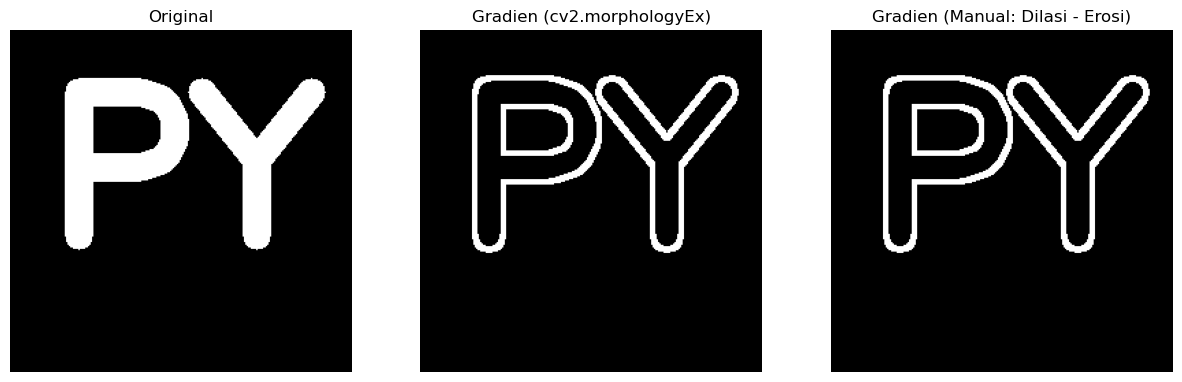

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((250, 250), dtype=np.uint8)
cv2.putText(img, "PY", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 5, (255), 20)

kernel = np.ones((5, 5), np.uint8)

img_gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

img_dilation = cv2.dilate(img, kernel, iterations=1)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_gradient_manual = cv2.subtract(img_dilation, img_erosion)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gradien (cv2.morphologyEx)")
plt.imshow(img_gradient, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Gradien (Manual: Dilasi - Erosi)")
plt.imshow(img_gradient_manual, cmap='gray')
plt.axis('off')

plt.show()

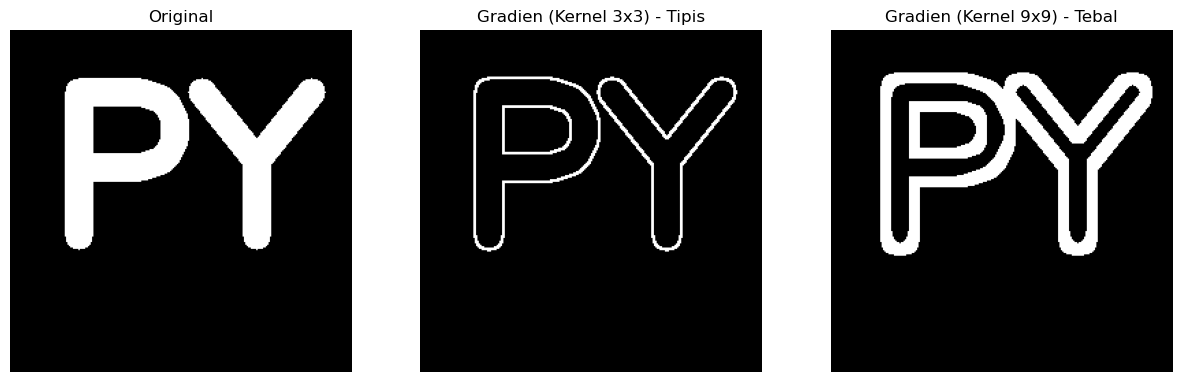

In [ ]:
kernel_small = np.ones((3, 3), np.uint8)
gradient_small = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel_small)

kernel_large = np.ones((9, 9), np.uint8)
gradient_large = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel_large)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gradien (Kernel 3x3) - Tipis")
plt.imshow(gradient_small, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Gradien (Kernel 9x9) - Tebal")
plt.imshow(gradient_large, cmap='gray')
plt.axis('off')

plt.show()

### 4.2 Top-Hat

**Teori:** Top-Hat adalah perbedaan antara citra asli dan hasil **Opening**-nya.
* Rumus: $T_{hat}(A) = A - (A \circ B)$
* Kegunaan: Sangat berguna pada citra grayscale untuk mendeteksi objek-objek kecil atau detail terang yang berada di atas latar belakang yang lebih gelap.

In [5]:
# Fungsi Bantu
def show(img, title='Result'):
    plt.figure(figsize=(5,5))
    if len(img.shape)==2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload gambar
img_path = "/content/image.jpg"  # corrected file path
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

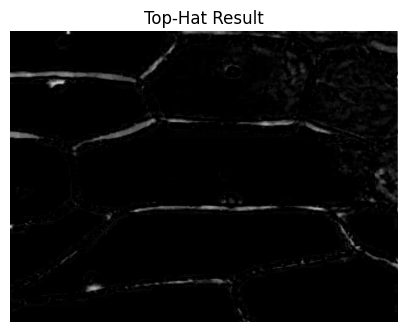

In [12]:
# Top Hat Method
# Definisi: Top-Hat = f - opening(f)
# Tujuan: menonjolkan bagian terang kecil di atas latar belakang.

def top_hat(img_gray, ksize=15, shape='ellipse'):
    if shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
    else:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))
    opened = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)
    result = cv2.subtract(img_gray, opened)
    return result

th_tophat = top_hat(img_gray, 15, 'ellipse')
show(th_tophat, 'Top-Hat Result')

### 4.3 Black-Hat (atau Bottom-Hat)

**Teori:** Black-Hat adalah perbedaan antara hasil **Closing** dan citra aslinya.
* Rumus: $B_{hat}(A) = (A \bullet B) - A$
* Kegunaan: Kebalikan dari Top-Hat. Berguna untuk mendeteksi objek/detail kecil yang gelap di atas latar belakang yang lebih terang (misal: celah, goresan).

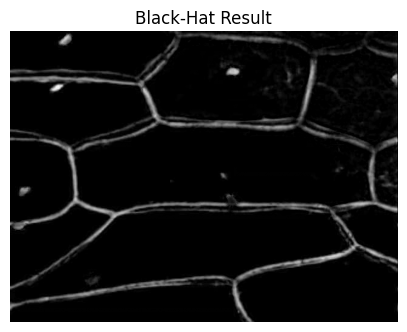

In [13]:
# Black-Hat (Bottom-Hat)
# Definisi: Black-Hat = closing(f) - f
# Tujuan: menonjolkan bagian gelap kecil pada latar terang.

def black_hat(img_gray, ksize=15, shape='ellipse'):
    if shape == 'ellipse':
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
    else:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))
    closed = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)
    result = cv2.subtract(closed, img_gray)
    return result

th_blackhat = black_hat(img_gray, 15, 'ellipse')
show(th_blackhat, 'Black-Hat Result')

### 4.4 Ekstraksi Batas (Boundary Extraction)

**Teori:** Mirip dengan Gradien Morfologi, tetapi secara spesifik didefinisikan sebagai perbedaan antara citra asli dan hasil **Erosi**-nya.
* Rumus: $\beta(A) = A - (A \ominus B)$
* Kegunaan: Menghasilkan batas *internal* objek (tepi bagian dalam).

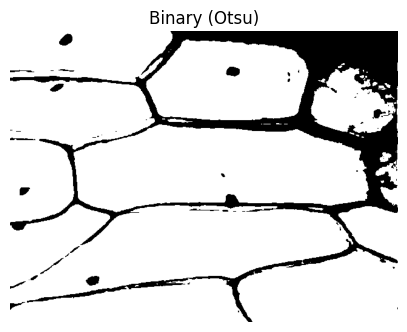

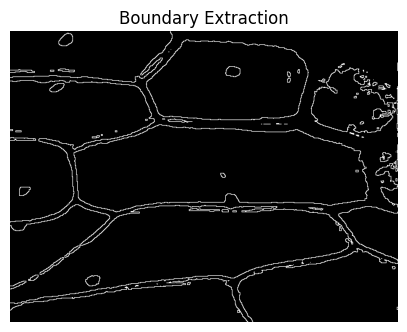

In [14]:
# Ekstraksi Batas (Boundary Extraction)
# Definisi: boundary = image - erode(image)
# Input harus berupa citra biner.

_, binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(binary, kernel, iterations=1)
boundary = cv2.subtract(binary, eroded)

show(binary, 'Binary (Otsu)')
show(boundary, 'Boundary Extraction')

### 4.5 Pengisian Lubang (Hole Filling)

**Teori:** Ini adalah algoritma yang lebih kompleks, seringkali menggunakan rekonstruksi morfologi atau `floodFill`. Tujuannya adalah mengisi semua lubang (area background) yang sepenuhnya dikelilingi oleh foreground.

**Implementasi Sederhana (menggunakan `floodFill`):**
1.  Buat *inverted image* (latar belakang jadi objek, objek jadi lubang).
2.  Gunakan `floodFill` dari titik yang pasti background (misal: 0,0) pada *inverted image*.
3.  Area yang terisi adalah semua area background yang terhubung ke tepi.
4.  Area yang *tidak* terisi adalah lubang.
5.  Inversi kembali hasilnya.

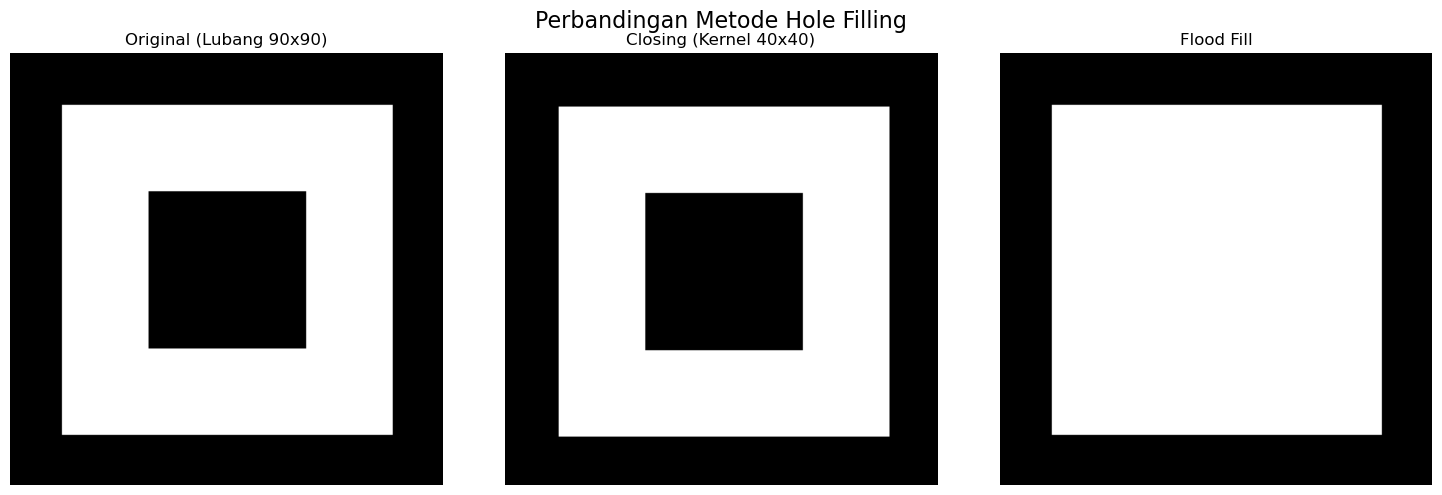

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((250, 250), dtype=np.uint8)
cv2.rectangle(img, (30, 30), (220, 220), 255, -1)
cv2.rectangle(img, (80, 80), (170, 170), 0, -1)
img_original = img.copy()

kernel_small = np.ones((40, 40), np.uint8)
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_small)

im_floodfill = img.copy()
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255)
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

img_filled = img_original | im_floodfill_inv

plt.figure(figsize=(15, 5))
plt.suptitle("Perbandingan Metode Hole Filling", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original (Lubang 90x90)")
plt.imshow(img_original, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Closing (Kernel 40x40)")
plt.imshow(img_closing, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Flood Fill")
plt.imshow(img_filled, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

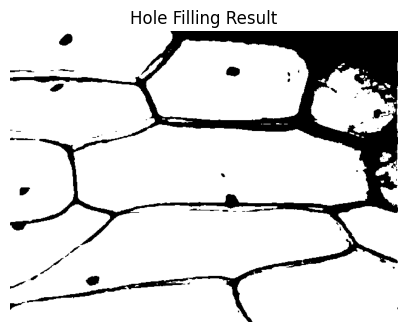

In [16]:
# Pengisian Lubang (Hole Filling)
# Teknik flood fill dari tepi citra untuk menutup area berlubang.

def hole_filling(binary_img):
    bin_img = (binary_img > 0).astype(np.uint8) * 255
    h, w = bin_img.shape
    mask = np.zeros((h+2, w+2), np.uint8)
    im_floodfill = bin_img.copy()
    inv = cv2.bitwise_not(im_floodfill)
    cv2.floodFill(inv, mask, (0,0), 255)
    inv = cv2.bitwise_not(inv)
    filled = cv2.bitwise_or(im_floodfill, inv)
    return filled

filled = hole_filling(binary)
show(filled, 'Hole Filling Result')

### 4.6 Transformasi Hit-or-Miss

**Teori:** Transformasi Hit-or-Miss (HMT) adalah operasi fundamental yang digunakan untuk menemukan pola piksel tertentu dalam citra biner (deteksi pola). Operasi ini menggunakan *dua* kernel (atau satu kernel gabungan) yang melacak *foreground* dan *background* secara bersamaan.

* **Kernel "Hit" ($B_1$):** Bagian yang harus cocok dengan *foreground* (piksel bernilai 1/255).
* **Kernel "Miss" ($B_2$):** Bagian yang harus cocok dengan *background* (piksel bernilai 0).

Sebuah piksel di output akan bernilai 1 (putih) *hanya jika* kernel "Hit" TEPAT pas dengan foreground objek DAN kernel "Miss" TEPAT pas dengan background di sekitarnya.

**Kegunaan:** Sangat spesifik untuk deteksi pola, seperti menemukan sudut, piksel terisolasi, atau titik akhir garis. Ini adalah dasar untuk operasi yang lebih kompleks seperti *Thinning* dan *Pruning*.

**Implementasi OpenCV:** Fungsi `cv2.morphologyEx` dengan `cv2.MORPH_HITMISS` menggunakan satu kernel di mana `1` berarti *foreground* (hit) dan `0` berarti *background* (miss).

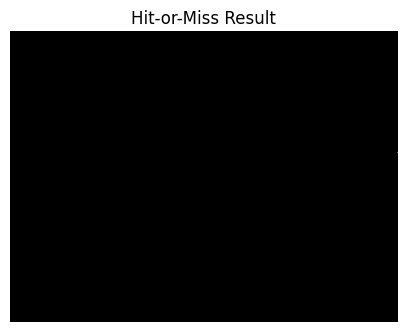

In [15]:
# Transformasi Hit-or-Miss
# Definisi: transformasi bentuk untuk mendeteksi pola tertentu.

kernel_hm = np.array([[-1, 1, -1],
                      [ 1, 1,  1],
                      [-1, 1, -1]], dtype=np.int8)

img01 = (binary > 0).astype(np.uint8)
try:
    hm = cv2.morphologyEx(img01, cv2.MORPH_HITMISS, kernel_hm)
    hm = (hm * 255).astype(np.uint8)
    show(hm, 'Hit-or-Miss Result')
except Exception as e:
    print('Transformasi Hit-or-Miss tidak tersedia di versi OpenCV ini:', e)

### 4.7 Thinning (Penipisan)

**Teori:** Thinning adalah proses *iteratif* yang digunakan untuk mengikis piksel-piksel batas dari sebuah objek biner. Tujuannya adalah untuk mengurangi objek menjadi "rangka" (skeleton) setebal 1 piksel.

Proses ini penting karena:
1.  **Mempertahankan Konektivitas:** Objek yang awalnya terhubung tidak akan terputus.
2.  **Mempertahankan Titik Akhir:** Garis tidak akan terkikis dari ujungnya.

Implementasi standarnya menggunakan serangkaian operasi Hit-or-Miss yang diulang berkali-kali dengan 8 kernel berbeda (mewakili 8 arah) hingga tidak ada lagi piksel yang dapat dihapus (konvergen).

**Implementasi OpenCV:** Operasi ini tidak ada di modul OpenCV utama. Operasi ini ada di modul `ximgproc` (Extended Image Processing) yang harus diinstal terpisah.

In [23]:
from skimage.morphology import skeletonize, reconstruction

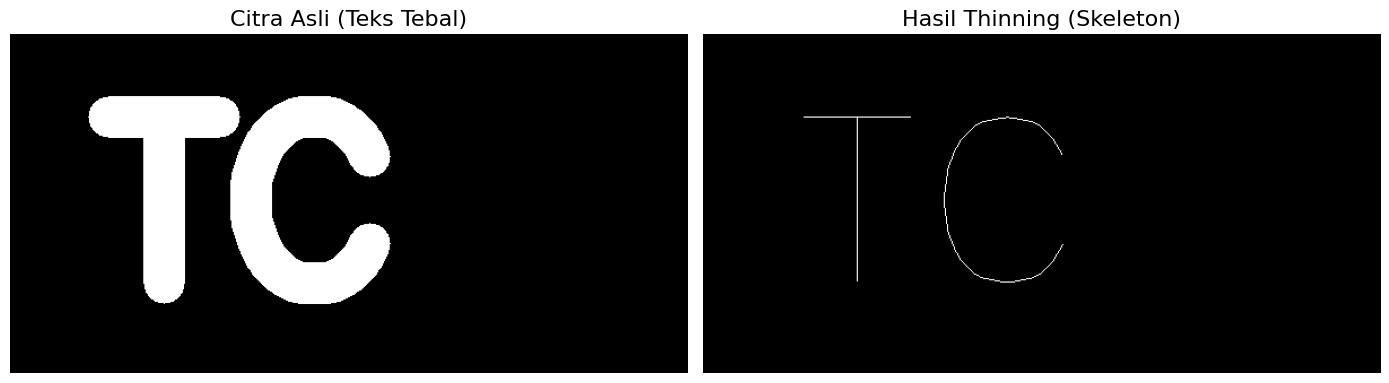

In [24]:
img_thin = np.zeros((300, 600), dtype=np.uint8)
cv2.putText(img_thin, "TC", (80, 220), cv2.FONT_HERSHEY_SIMPLEX, 7, 255, 35)

# Thinning / Skeletonization
binary = img_thin > 0
thinned = skeletonize(binary)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1); plt.imshow(binary, cmap='gray')
plt.title("Citra Asli (Teks Tebal)", fontsize=16)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(thinned, cmap='gray')
plt.title("Hasil Thinning (Skeleton)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

### 4.8 Rekonstruksi Morfologi

**Teori:** Ini adalah konsep yang sangat kuat, bukan satu operasi tunggal. Rekonstruksi menggunakan dua citra:
1.  **Marker (Penanda):** Citra awal tempat proses dimulai.
2.  **Mask (Topeng):** Citra yang membatasi penyebaran proses.

Prosesnya (untuk rekonstruksi dengan dilasi):
1.  Mulai dengan citra "marker".
2.  Lakukan dilasi pada "marker" menggunakan SE (misal: 3x3).
3.  Hasil dilasi kemudian di-"klip" agar tidak melebihi "mask" (biasanya dengan operasi `bitwise_and` antara hasil dilasi dan mask).
4.  Ulangi langkah 2 dan 3, menggunakan hasil dari langkah 3 sebagai "marker" baru.
5.  Berhenti ketika "marker" tidak lagi berubah (konvergen).


**Kegunaan:** Sangat banyak. Contoh klasik: "membersihkan" objek yang menyentuh batas, atau mengisi lubang (versi yang lebih stabil daripada `floodFill`).

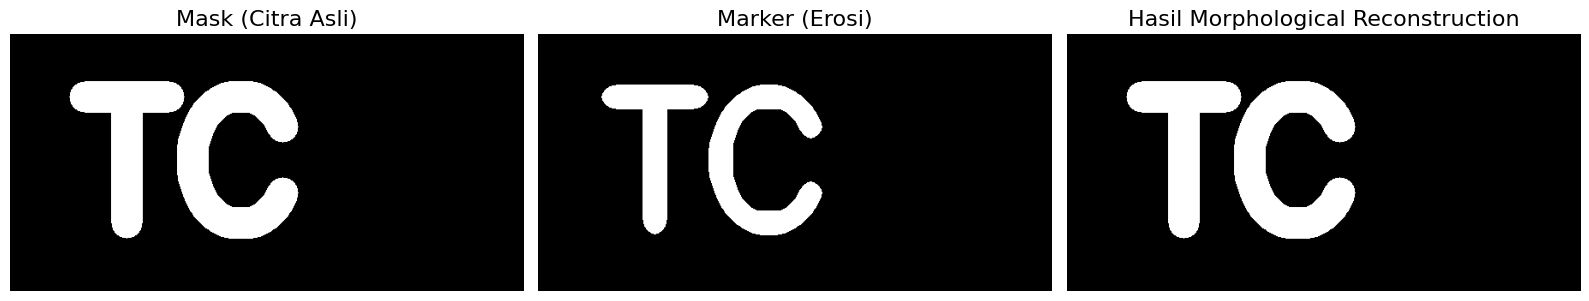

In [27]:
img_rec = np.zeros((300, 600), dtype=np.uint8)
cv2.putText(img_rec, "TC", (80, 220), cv2.FONT_HERSHEY_SIMPLEX, 7, 255, 35)

mask = img_rec.copy()
marker = cv2.erode(img_rec, np.ones((9, 9), np.uint8))

# Rekonstruksi morfologi
marker_f = marker.astype(float)
mask_f = mask.astype(float)
reconstructed = reconstruction(marker_f, mask_f, method='dilation')

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1); plt.imshow(mask, cmap='gray')
plt.title("Mask (Citra Asli)", fontsize=16)
plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(marker, cmap='gray')
plt.title("Marker (Erosi)", fontsize=16)
plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(reconstructed, cmap='gray')
plt.title("Hasil Morphological Reconstruction", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()